In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
n_fft=2048
hop_length=512
win_length=2048
window='hann'
center=True
pad_mode='constant'

In [3]:
x, fs = librosa.load('/Users/salvid/Desktop/test_track_vocoder/VOCALS_TEST.wav', sr=None)
x = x[:94208]

In [4]:
D = librosa.stft(x, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window, center=center, pad_mode=pad_mode)
magnitude, phase = np.abs(D), np.angle(D)

In [5]:
def plot_spectrograms(x1, x2):

    p_mag_spec = librosa.stft(x1, n_fft=n_fft, win_length=win_length, hop_length=hop_length, window=window, center=True)
    b = np.abs(p_mag_spec) ** 2
    pow_spec = librosa.power_to_db(b)
    
    p_mag_spec2 = librosa.stft(x2, n_fft=n_fft, win_length=win_length, hop_length=hop_length, window=window, center=True)
    b2 = np.abs(p_mag_spec2) ** 2
    pow_spec2 = librosa.power_to_db(b2)

    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    librosa.display.specshow(pow_spec, sr=16000,  y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Original power spec')
    plt.subplot(3,1,2)
    librosa.display.specshow(pow_spec2, sr=16000,  y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Reconstructed power spec')
    plt.subplot(3,1,3)
    librosa.display.specshow(np.abs(pow_spec2-pow_spec), sr=16000, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')    
    plt.title(f'Difference')
    plt.tight_layout()
    plt.show()

    print(f'Spectrogram error: {np.sum(np.abs(pow_spec2-pow_spec)):.2f}')

## TEST WITH MAGNITUDE

In [6]:
D_rec = magnitude * np.exp(1j * phase)
x_rec = librosa.istft(D_rec, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window, center=center)

In [7]:
D_2 = librosa.stft(x_rec, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window, center=center, pad_mode=pad_mode)
magnitude_2, phase_2 = np.abs(D_2), np.angle(D_2)

In [8]:
print(f'Orig. signal shape: {x.shape} - Recon. signal shape: {x_rec.shape}')
print()
print(f'Signal error: {np.sum(x - x_rec):.2f}')
print(f'Magnitude error: {np.sum(magnitude-magnitude_2):.2f}')

Orig. signal shape: (94208,) - Recon. signal shape: (94208,)

Signal error: -0.00
Magnitude error: 0.00


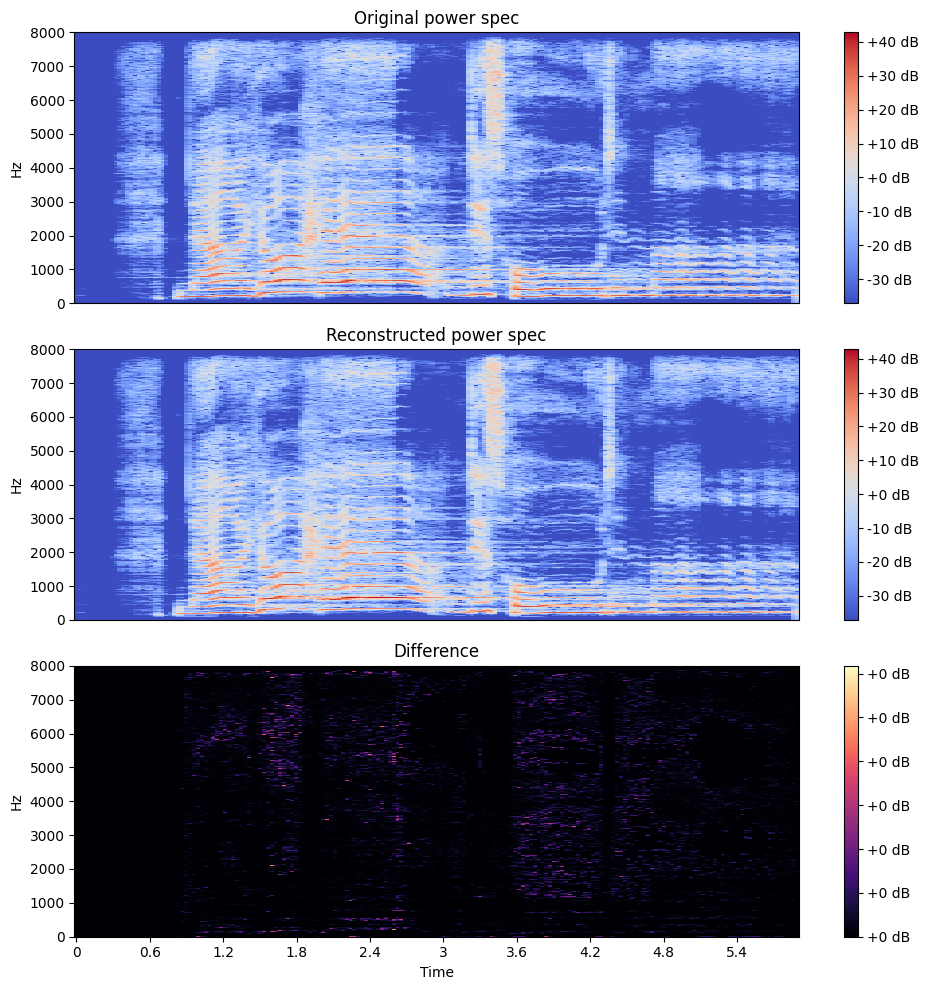

Spectrogram error: 1.06


In [9]:
plot_spectrograms(x, x_rec)

## TEST WITH POWER SPECTROGRAM

In [10]:
magnitude_sq = magnitude ** 2
magnitude = np.sqrt(magnitude_sq)

D_rec = magnitude * np.exp(1j * phase)
x_rec = librosa.istft(D_rec, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window, center=center)

In [11]:
D_2 = librosa.stft(x_rec, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window, center=center, pad_mode=pad_mode)
magnitude_2, phase_2 = np.abs(D_2), np.angle(D_2)

In [12]:
print(f'Orig. signal shape: {x.shape} - Recon. signal shape: {x_rec.shape}')
print()
print(f'Signal error: {np.sum(x - x_rec):.2f}')
print(f'Magnitude error: {np.sum(magnitude-magnitude_2):.2f}')

Orig. signal shape: (94208,) - Recon. signal shape: (94208,)

Signal error: -0.00
Magnitude error: 0.00


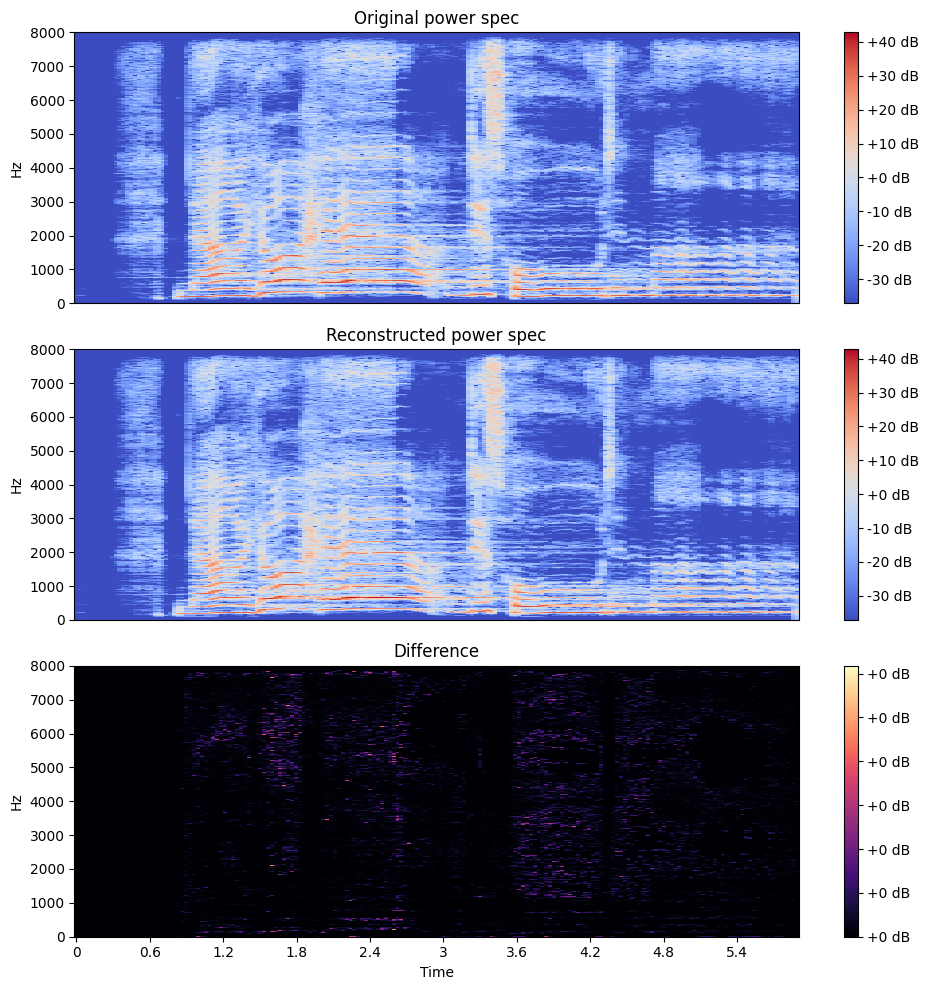

Spectrogram error: 1.06


In [13]:
plot_spectrograms(x, x_rec)

## TEST WITH POWER SPECTROGRAM IN DB

In [14]:
magnitude_sq = magnitude ** 2
magnitude_db = librosa.power_to_db(magnitude_sq, ref=np.max)

magnitude_lin = librosa.db_to_power(magnitude_db)
magnitude = np.sqrt(magnitude_lin)

D_rec = magnitude * np.exp(1j * phase)
x_rec = librosa.istft(D_rec, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window, center=center)

In [15]:
D_2 = librosa.stft(x_rec, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window, center=center, pad_mode=pad_mode)
magnitude_2, phase_2 = np.abs(D_2), np.angle(D_2)

In [16]:
print(f'Orig. signal shape: {x.shape} - Recon. signal shape: {x_rec.shape}')
print()
print(f'Signal error: {np.sum(x - x_rec):.2f}')
print(f'Magnitude error: {np.sum(magnitude-magnitude_2):.2f}')

Orig. signal shape: (94208,) - Recon. signal shape: (94208,)

Signal error: -1.09
Magnitude error: 0.91


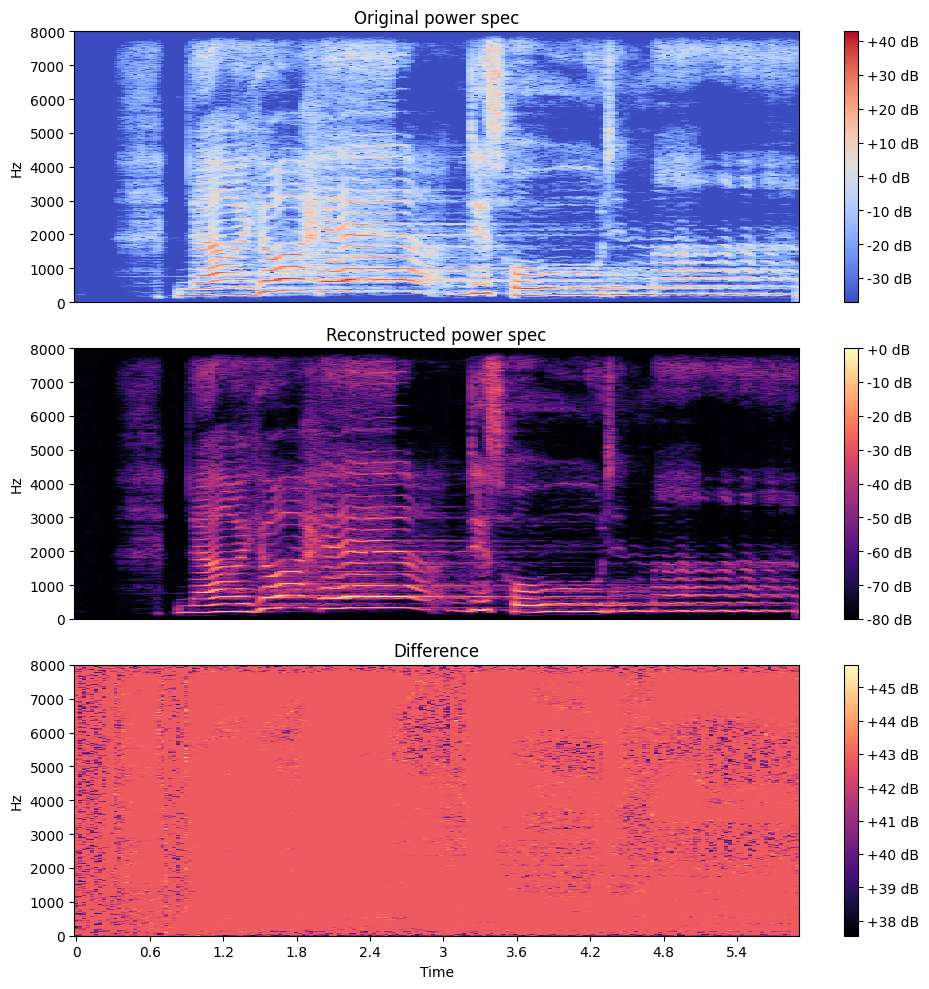

Spectrogram error: 8100187.50


In [17]:
plot_spectrograms(x, x_rec)

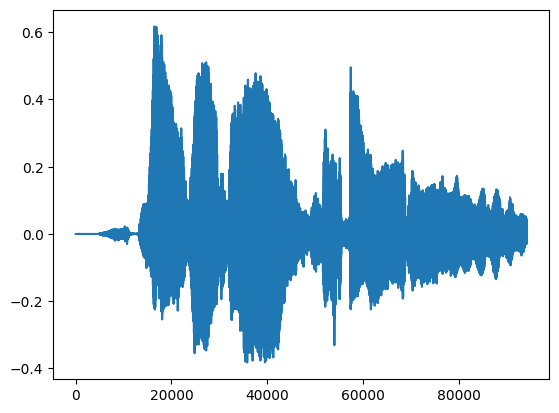

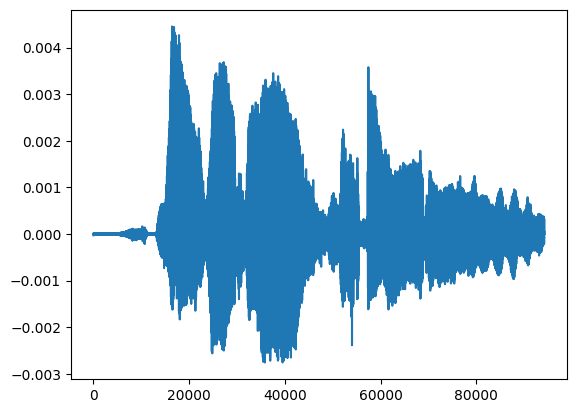

In [18]:
plt.plot(x)
plt.show()
plt.plot(x_rec)
plt.show()